In [1]:
import quadcopter
import numerical_integrator
import numpy as np
from visualizer.plot import plot_graph
from visualizer.advanced_visualizer import advanced_3d_visualization

In [2]:
x_0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).transpose()

tf_s = 10 # t final step in second
dt = 0.004 # time step

t_s = np.arange(0, tf_s, dt)    #time step
nt_s = t_s.size                 #number of timestep

x = np.empty((12, nt_s), dtype=float)
x_RK4 = np.empty((12, nt_s), dtype=float)

x[:,0] = x_0
x_RK4[:,0] = x_0

u = np.array([4, 4, 4, 4]).transpose()

In [3]:
#run simulation
for i in range(1, nt_s):
    x[:,i] = numerical_integrator.trapeziodal(quadcopter.quadcopter_dynamics , x[:,i-1], u , dt)
    x_RK4[:,i] = numerical_integrator.RK4(quadcopter.quadcopter_dynamics , x_RK4[:,i-1], u , dt)


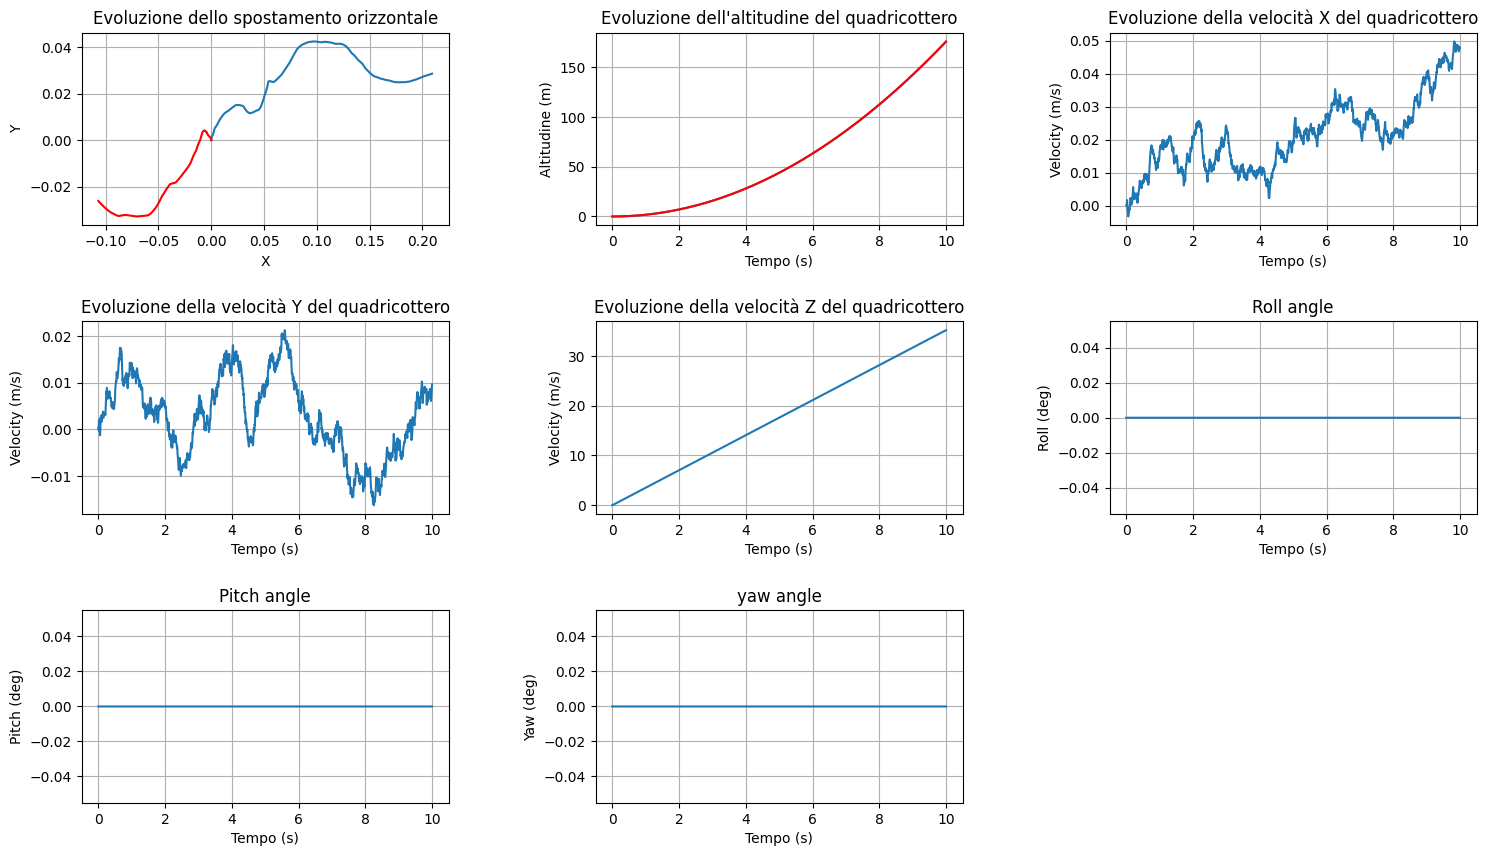

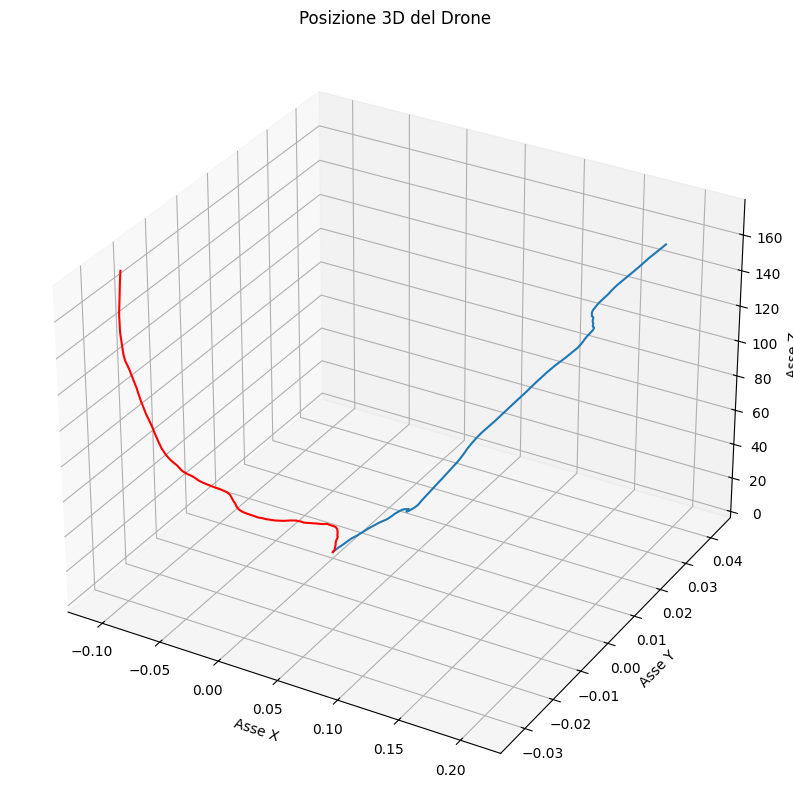

In [4]:
#salvataggio e visualizzazione dei dati
header = "x, y, z, x_dot, y_dot, z_dot, phi, theta, psi, p, q, r"
with open("./data/state.csv", "w", newline="\n") as f:
    np.savetxt(f, x.T, delimiter=",",header=header, fmt="%.5f")

plot_graph(x, x_RK4, t_s)

advanced_3d_visualization(x_RK4)